## Analyzing Popular Apps on Google Playstore 
In this project, the goal is to figure out the apps that are being popular on playstore. We work in a company which develops free apps and earns money through ads. By figuring this out, we can help the developers in creating apps that attract more users and generate more revenue. We will analyze the data from Google Playstore to identify the patterns and preferences among users. Then by identifying this, we can make better decisions about which type of apps needs to be developed more. 

In [205]:
import pandas as pd
import matplotlib.pyplot as plt

In [206]:
#Read the Google Playstore dataset into Pandas Dataframe
gps_data = pd.read_csv("googleplaystore.csv")
gps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [207]:
gps_data["Category"].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [208]:
gps_data[gps_data["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [209]:
#The category column value is missed in this row
gps_data[gps_data['Category'] == '1.9'].values

array([['Life Made WI-Fi Touchscreen Photo Frame', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', nan, 'February 11, 2018',
        '1.0.19', '4.0 and up', nan]], dtype=object)

In [210]:
#The "Life Made WI-Fi Touchscreen Photo Frame" category is "LIFESTYLE"
#Adding LIFESTYLE Category
clean_list = ['Life Made WI-Fi Touchscreen Photo Frame','LIFESTYLE', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone','LIFESTYLE', 'February 11, 2018',
        '1.0.19', '4.0 and up']
clean_list

['Life Made WI-Fi Touchscreen Photo Frame',
 'LIFESTYLE',
 '1.9',
 19.0,
 '3.0M',
 '1,000+',
 'Free',
 '0',
 'Everyone',
 'LIFESTYLE',
 'February 11, 2018',
 '1.0.19',
 '4.0 and up']

In [211]:
gps_data[gps_data["Category"] == "1.9"] = clean_list

In [212]:
gps_category = gps_data["Category"].value_counts()
gps_category

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [213]:
app_count = gps_data['App'].value_counts()
app_count

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

## Removing Duplicate Entries

### Part One
If we analyze the data then we'll find out that there are so many apps that have duplicate entries.

In [214]:
#For Duplicate Apps
app_count[app_count>1]

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Transenger – Ts Dating and Chat for Free             2
Random Video Chat                                    2
Clover Dating App                                    2
Docs To Go™ Free Office Suite                        2
English Dictionary - Offline                         2
Name: App, Length: 798, dtype: int64

In [215]:
"Instagram" in app_count[app_count>1].index

True

In [216]:
gps_data[gps_data['App'] == "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [217]:
#Checking duplicate rows based on the App column
duplicate_apps_df = gps_data[gps_data.duplicated(subset="App", keep=False)]

duplicate_apps_df[duplicate_apps_df["App"] == "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [218]:
#Number of Duplicate Apps
total_duplicate_apps = duplicate_apps_df["App"].nunique()
total_duplicate_apps

798

In [220]:
gps_data.shape

(10841, 13)

In [222]:
gps_data["App"].nunique()

9660

#### 
When we analyze the data, we don't want to count the Apps more than once so we need to remove the duplicate apps and keep only one entry per app. We can remove the duplicates randomly but we'll use better approach. i.e. If we examine the rows carefully than we'll find out that there is a difference in number of reviews in Reviews column. This shows that the data was collected at different times so we can use this criteria to keep the rows. So, we'll keep the rows that has higher number of reviews. 

### Part Two

In [223]:
#Group By App and find the maximum number of reviews for each app
max_reviews = gps_data.groupby("App")['Reviews'].max()

In [224]:
max_reviews

App
"i DT" Fútbol. Todos Somos Técnicos.                   27
+Download 4 Instagram Twitter                       40467
- Free Comics - Comic Apps                            115
.R                                                    259
/u/app                                                573
                                                    ...  
뽕티비 - 개인방송, 인터넷방송, BJ방송                               414
💎 I'm rich                                            718
💘 WhatsLov: Smileys of love, stickers and GIF       22098
📏 Smart Ruler ↔️ cm/inch measuring for homework!       19
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    11661
Name: Reviews, Length: 9660, dtype: object

In [322]:
#To iterate in the dataframe
#for index , row in gps_data.iterrows():
    #if row['App'] == "Instagram":
    #print(row["App"] , row["Reviews"])



In [226]:
#Create an empty list to store cleaned data 
gps_clean  = []

#Create an empty list to store the data that's already in clean_lst
already_added = []

#For Loop to iterate through each row in df
for index , row in gps_data.iterrows():
    name = row['App']
    n_reviews = row['Reviews']
    
    if (max_reviews[name] == n_reviews) and (name not in already_added): 
        gps_clean.append(row)
        already_added.append(name)


In [227]:
#Converting Series into Dataframe
gps_clean = pd.DataFrame(gps_clean)

In [228]:
gps_clean.shape

(9660, 13)

## Removing Non-English Apps

If we observe the requirements then we'll find out that the company makes only English apps but the dataset contains some apps that are non-english so we'll remove those apps. 

In [229]:
#English characters are mapped on ASCII code of 0-127
ord("a") , ord("b") , ord("A")

(97, 98, 65)

In [230]:
def is_english(app_name): 
    lst = []
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else: 
            lst.append(True)
    non_ascii = 0
    for j in lst:
        if j == False: 
            non_ascii += 1
    if non_ascii > 3: 
        return False
    else: 
        return True
        
        

In [231]:
is_english("Instagram")

True

In [232]:
gps_english = gps_clean[gps_clean['App'].apply(is_english)]

In [233]:
gps_english.shape

(9615, 13)

## Keeping free Apps
As it is mentioned earlier that the company makes only free apps and generate revenues through ads so we'll remove the paid apps from the dataset and keep only the free ones.

In [234]:
gps_english['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$11.99', '$79.99', '$16.99', '$14.99', '$1.00',
       '$29.99', '$12.99', '$2.49', '$24.99', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [235]:
gps_final = gps_english[gps_english["Price"] == '0']

In [236]:
gps_final.shape

(8863, 13)

In [237]:
gps_final

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Analysis

## Most Common Apps by Genre

In [238]:
gps_final['Category'].value_counts(normalize = True)*100 #Normalize = True returns the relative proportions of each unique value

FAMILY                 18.932641
GAME                    9.691978
TOOLS                   8.450863
BUSINESS                4.592125
LIFESTYLE               3.915153
PRODUCTIVITY            3.892587
FINANCE                 3.700779
MEDICAL                 3.520253
SPORTS                  3.396141
PERSONALIZATION         3.317161
COMMUNICATION           3.238181
HEALTH_AND_FITNESS      3.080221
PHOTOGRAPHY             2.944827
NEWS_AND_MAGAZINES      2.798150
SOCIAL                  2.662755
TRAVEL_AND_LOCAL        2.335552
SHOPPING                2.245289
BOOKS_AND_REFERENCE     2.143744
DATING                  1.861672
VIDEO_PLAYERS           1.793975
MAPS_AND_NAVIGATION     1.399075
FOOD_AND_DRINK          1.241115
EDUCATION               1.173418
ENTERTAINMENT           0.959043
LIBRARIES_AND_DEMO      0.936477
AUTO_AND_VEHICLES       0.925195
HOUSE_AND_HOME          0.823649
WEATHER                 0.801083
EVENTS                  0.710820
PARENTING               0.654406
ART_AND_DE

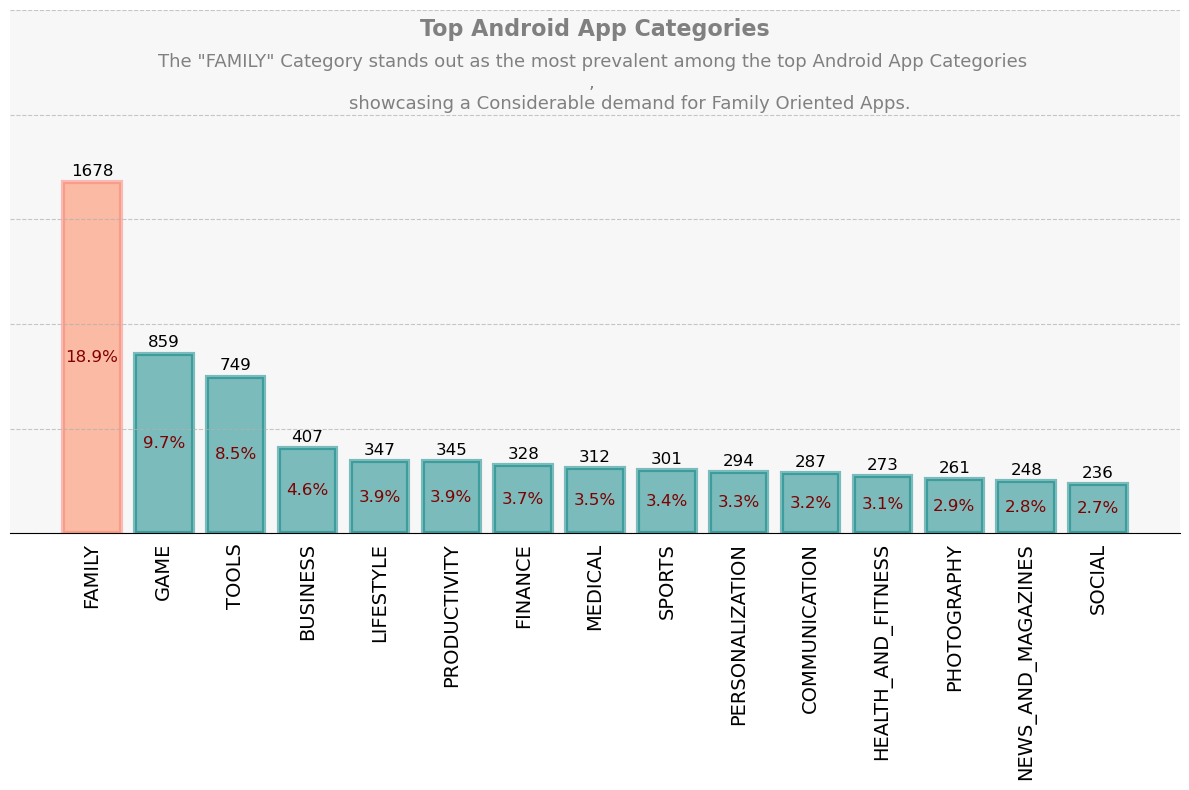

In [239]:
#Data 
categories = gps_final['Category'].value_counts().index[:15]
counts = gps_final['Category'].value_counts().values[:15]
percentage = round(gps_final['Category'].value_counts(normalize=True)*100 , 1)[:15]

#Creating a stylish bar
plt.figure(figsize = (12,8))
bars = plt.bar(categories , counts , color = 'teal' , alpha = 0.5, edgecolor = 'teal', linewidth = 3)
plt.xticks(rotation = 90 , fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(axis = 'y' , linestyle = '--' , alpha = 0.7)
plt.grid(axis = 'x' , linestyle = '')
plt.xticks(fontsize = 14)
plt.yticks(range(0,3000,500) , [] , fontsize = 10)
plt.tick_params(bottom = 0 , left = 0)

#Find the Category with the highest Count
max_count_category = categories[counts.argmax()]

#Highlight the bar for the category with highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color('coral')
bars[max_count_index].set_edgecolor('salmon')

#Adding data labels and Percentages inside bar 
for bar , perc in zip(bars , percentage): 
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 , height + 15 , "%d" % int(height) , ha = 'center', va = 'bottom' , fontsize = 12 )
    plt.text(bar.get_x() + bar.get_width() / 2 , height / 2 , f'{perc}%' , ha = 'center' , va = 'center' , fontsize = 12 , color = 'maroon'  )

#Set a background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

#Adding Chart Title Inside the chart
plt.text(0.5 , 0.95 , 'Top Android App Categories' , horizontalalignment = 'center' , fontsize = 16  ,
         transform = plt.gca().transAxes , color = 'gray' , fontweight = 'bold' )

#Ading Conclusion Inside the Chart
plt.text(0.5 , 0.86 , """The "FAMILY" Category stands out as the most prevalent among the top Android App Categories \n, 
            showcasing a Considerable demand for Family Oriented Apps.""", horizontalalignment = 'center' , 
             verticalalignment = 'center', fontsize = 13 , transform = plt.gca().transAxes , color = 'grey')

#Remove Spines
for i in ['top', 'right', 'left']:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout()
    

plt.show()









In [240]:
gps_final[gps_final['Category'] == "FAMILY"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 23, 2018",1.9.3901,4.0.3 and up
2018,Coloring & Learn,FAMILY,4.4,12753,51M,"5,000,000+",Free,0,Everyone,Educational;Creativity,"July 17, 2018",1.49,4.0.3 and up
2019,Mahjong,FAMILY,4.5,33983,22M,"5,000,000+",Free,0,Everyone,Puzzle;Brain Games,"August 2, 2018",1.24.3181,4.0.3 and up
2020,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.6,20267,46M,"1,000,000+",Free,0,Everyone,Educational;Education,"July 16, 2018",1.1.6.7,4.1 and up
2021,Toy Pop Cubes,FAMILY,4.5,5761,21M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 4, 2018",1.8.3181,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,Poop FR,FAMILY,NaN,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


## Mostly Installed Apps on Google Play

In [241]:
gps_final['Installs'].value_counts(normalize = True)*100

1,000,000+        15.739592
100,000+          11.553650
10,000,000+       10.515627
10,000+           10.199707
1,000+             8.405732
100+               6.916394
5,000,000+         6.837414
500,000+           5.573733
50,000+            4.772650
5,000+             4.513145
10+                3.542818
500+               3.249464
50,000,000+        2.290421
100,000,000+       2.121178
50+                1.918086
5+                 0.789800
1+                 0.507729
500,000,000+       0.270789
1,000,000,000+     0.225657
0+                 0.045131
0                  0.011283
Name: Installs, dtype: float64

In [242]:
gps_final["Installs_int"] = gps_final["Installs"].str.replace(",","").str.replace("+","").astype(int)

C:\Users\SAAD\AppData\Local\Temp\ipykernel_3752\1234383930.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gps_final["Installs_int"] = gps_final["Installs"].str.replace(",","").str.replace("+","").astype(int)
C:\Users\SAAD\AppData\Local\Temp\ipykernel_3752\1234383930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps_final["Installs_int"] = gps_final["Installs"].str.replace(",","").str.replace("+","").astype(int)


In [243]:
gps_final["Installs_int"]

0           10000
2         5000000
3        50000000
4          100000
5           50000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs_int, Length: 8863, dtype: int32

In [244]:
install_frq = gps_final["Installs_int"].value_counts().sort_index()
install_frq = install_frq[install_frq.index > 500]
install_frq

1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: Installs_int, dtype: int64

In [247]:
install_frq_perc = round(gps_final["Installs_int"].value_counts(normalize = True)*100,2).sort_index()
install_frq_perc = install_frq_perc[install_frq_perc.index > 500]
install_frq_perc

1000           8.41
5000           4.51
10000         10.20
50000          4.77
100000        11.55
500000         5.57
1000000       15.74
5000000        6.84
10000000      10.52
50000000       2.29
100000000      2.12
500000000      0.27
1000000000     0.23
Name: Installs_int, dtype: float64

In [250]:
#Alphanumeric units
def alphanumeric_units(value): 
    if value >= 1e9: 
        return f"{value / 1e9:.0f}B"
    if value >= 1e6: 
        return f"{value / 1e6:.0f}M"
    if value >= 1e3: 
        return f"{value / 1e3:.0f}K"
    else: 
        return f'{value:.0f}'

In [251]:
alphanumeric_units(10000)

'10K'

In [252]:
install_frq.index = install_frq.index.map(alphanumeric_units)
install_frq

1K       745
5K       400
10K      904
50K      423
100K    1024
500K     494
1M      1395
5M       606
10M      932
50M      203
100M     188
500M      24
1B        20
Name: Installs_int, dtype: int64

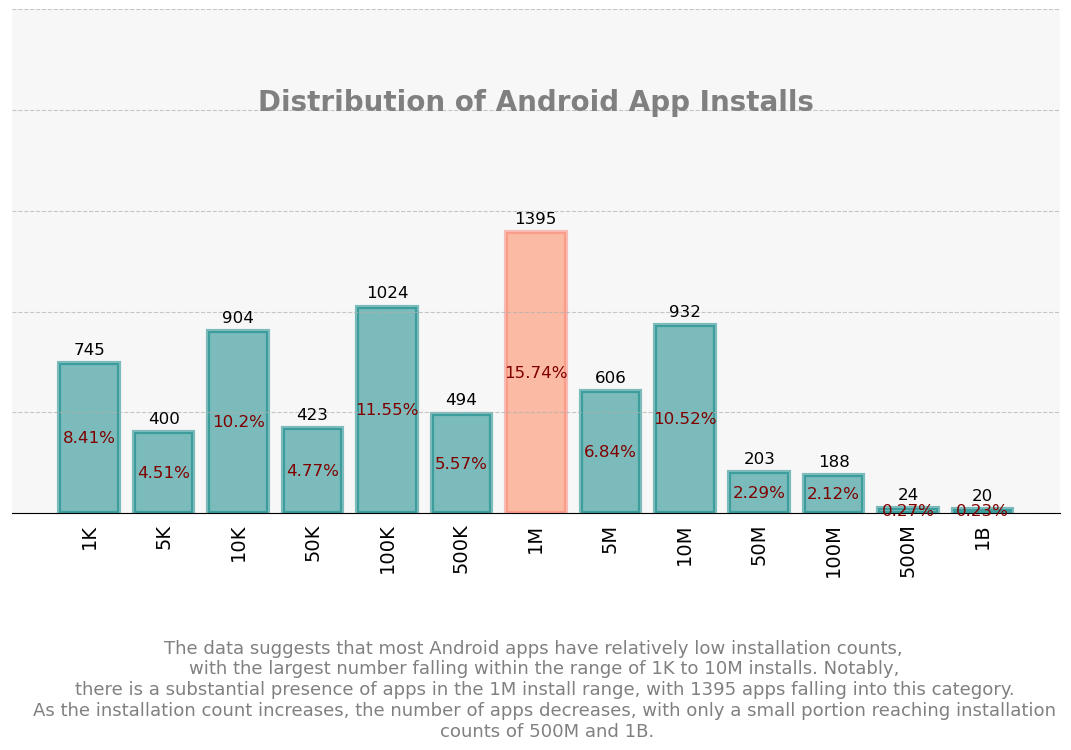

In [260]:
#Data 
categories = install_frq.index
counts = install_frq.values
percentage = install_frq_perc.values

#Creating a stylish bar
plt.figure(figsize = (12,8))
bars = plt.bar(categories , counts , color = 'teal' , alpha = 0.5, edgecolor = 'teal', linewidth = 3)
plt.xticks(rotation = 90 , fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(axis = 'y' , linestyle = '--' , alpha = 0.7)
plt.grid(axis = 'x' , linestyle = '')
plt.xticks(fontsize = 14)
plt.yticks(range(0,3000,500) , [] , fontsize = 10)
plt.tick_params(bottom = 0 , left = 0)

#Find the Category with the highest Count
max_count_category = categories[counts.argmax()]

#Highlight the bar for the category with highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color('coral')
bars[max_count_index].set_edgecolor('salmon')

#Adding data labels and Percentages inside bar 
for bar , perc in zip(bars , percentage): 
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 , height + 30 , "%d" % int(height) , ha = 'center', va = 'bottom' , fontsize = 12 )
    plt.text(bar.get_x() + bar.get_width() / 2 , height / 2 , f'{perc}%' , ha = 'center' , va = 'center' , fontsize = 12 , color = 'maroon'  )

#Set a background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

#Adding Chart Title Inside the chart
plt.text(0.5 , 0.8 , 'Distribution of Android App Installs' , horizontalalignment = 'center' , fontsize = 20  ,
         transform = plt.gca().transAxes , color = 'gray' , fontweight = 'bold' )

#Ading Conclusion Inside the Chart
plt.text(0.5 , -0.35 , """The data suggests that most Android apps have relatively low installation counts, 
    with the largest number falling within the range of 1K to 10M installs. Notably, 
    there is a substantial presence of apps in the 1M install range, with 1395 apps falling into this category. 
    As the installation count increases, the number of apps decreases, with only a small portion reaching installation 
    counts of 500M and 1B.""", horizontalalignment = 'center' , 
             verticalalignment = 'center', fontsize = 13 , transform = plt.gca().transAxes , color = 'grey')

#Remove Spines
for i in ['top', 'right', 'left']:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout()
    

plt.show()









In [261]:
category_gps = gps_final["Category"].unique()
category_gps

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [262]:
pd.pivot_table(gps_final , values = 'Installs_int' , index = "Category" , aggfunc = 'mean')

,Installs_int
Category,
ART_AND_DESIGN,1.986335e+06
AUTO_AND_VEHICLES,6.473178e+05
BEAUTY,5.131519e+05
BOOKS_AND_REFERENCE,8.767812e+06
BUSINESS,1.712290e+06
COMICS,8.176573e+05
COMMUNICATION,3.845612e+07
DATING,8.540288e+05
EDUCATION,1.820673e+06


In [263]:
#Display Dataframe without Scientific Notation
pd.options.display.float_format = '{:.0f}'.format

In [265]:
categories_installs = pd.pivot_table(gps_final , values = 'Installs_int' , index = "Category" , aggfunc = 'mean')
categories_installs = categories_installs.sort_values(by = "Installs_int" , ascending = False)
categories_installs = categories_installs["Installs_int"]
categories_installs

Category
COMMUNICATION         38456119
VIDEO_PLAYERS         24727872
SOCIAL                23253652
PHOTOGRAPHY           17805628
PRODUCTIVITY          16787331
GAME                  15560966
TRAVEL_AND_LOCAL      13984078
ENTERTAINMENT         11640706
TOOLS                 10682301
NEWS_AND_MAGAZINES     9549178
BOOKS_AND_REFERENCE    8767812
SHOPPING               7036877
PERSONALIZATION        5201483
WEATHER                5074486
HEALTH_AND_FITNESS     4188822
MAPS_AND_NAVIGATION    4056942
FAMILY                 3694276
SPORTS                 3638640
ART_AND_DESIGN         1986335
FOOD_AND_DRINK         1924898
EDUCATION              1820673
BUSINESS               1712290
LIFESTYLE              1433676
FINANCE                1387692
HOUSE_AND_HOME         1331541
DATING                  854029
COMICS                  817657
AUTO_AND_VEHICLES       647318
LIBRARIES_AND_DEMO      638504
PARENTING               542604
BEAUTY                  513152
EVENTS                  253542

In [266]:
#Alphanumeric units
def alphanumeric_units(value): 
    if value >= 1e9: 
        return f"{value / 1e9:.1f}B"
    if value >= 1e6: 
        return f"{value / 1e6:.1f}M"
    if value >= 1e3: 
        return f"{value / 1e3:.1f}K"
    else: 
        return f'{value:.1f}'

In [268]:
categories_installs_unit = categories_installs.map(alphanumeric_units)
categories_installs_unit

Category
COMMUNICATION           38.5M
VIDEO_PLAYERS           24.7M
SOCIAL                  23.3M
PHOTOGRAPHY             17.8M
PRODUCTIVITY            16.8M
GAME                    15.6M
TRAVEL_AND_LOCAL        14.0M
ENTERTAINMENT           11.6M
TOOLS                   10.7M
NEWS_AND_MAGAZINES       9.5M
BOOKS_AND_REFERENCE      8.8M
SHOPPING                 7.0M
PERSONALIZATION          5.2M
WEATHER                  5.1M
HEALTH_AND_FITNESS       4.2M
MAPS_AND_NAVIGATION      4.1M
FAMILY                   3.7M
SPORTS                   3.6M
ART_AND_DESIGN           2.0M
FOOD_AND_DRINK           1.9M
EDUCATION                1.8M
BUSINESS                 1.7M
LIFESTYLE                1.4M
FINANCE                  1.4M
HOUSE_AND_HOME           1.3M
DATING                 854.0K
COMICS                 817.7K
AUTO_AND_VEHICLES      647.3K
LIBRARIES_AND_DEMO     638.5K
PARENTING              542.6K
BEAUTY                 513.2K
EVENTS                 253.5K
MEDICAL                120.6K
N

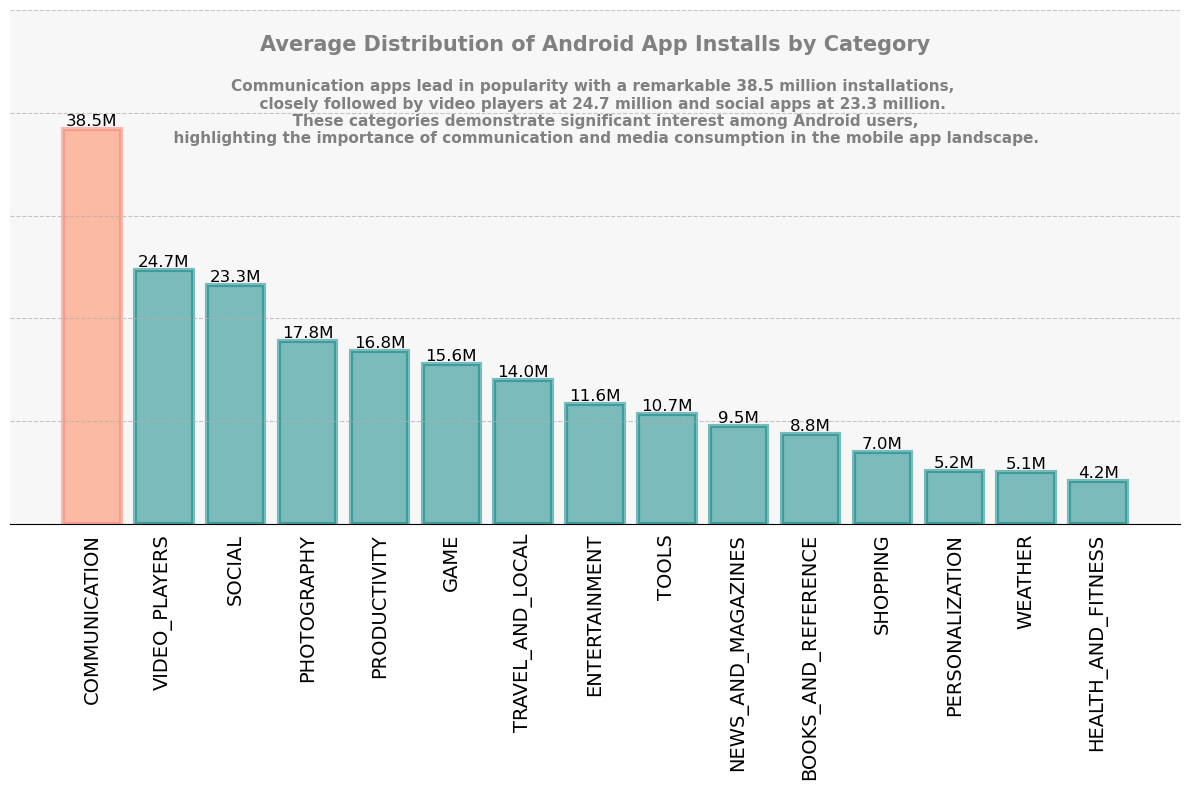

In [297]:
#Data 
categories = categories_installs.index[:15]
counts = categories_installs.values[:15]

#Creating a stylish bar
plt.figure(figsize = (12,8))
bars = plt.bar(categories , counts , color = 'teal' , alpha = 0.5, edgecolor = 'teal', linewidth = 3)
plt.xticks(rotation = 90 , fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(axis = 'y' , linestyle = '--' , alpha = 0.7)
plt.grid(axis = 'x' , linestyle = '')
plt.xticks(fontsize = 14)
plt.yticks(range(0,60000000,10000000) , [] , fontsize = 12)
plt.tick_params(bottom = 0 , left = 0)

#Find the Category with the highest Count
max_count_category = categories[counts.argmax()]

#Highlight the bar for the category with highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color('coral')
bars[max_count_index].set_edgecolor('salmon')

#Adding data labels and Percentages inside bar 
for bar , units in zip(bars , categories_installs_unit.values): 
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 , height + 60 , units , ha = 'center', va = 'bottom' , fontsize = 12 )
    
#Set a background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

#Adding Chart Title Inside the chart
plt.text(0.5 , 0.92 , 'Average Distribution of Android App Installs by Category' , horizontalalignment = 'center' , fontsize = 15  ,
         transform = plt.gca().transAxes , color = 'gray' , fontweight = 'bold' )

#Ading Conclusion Inside the Chart
plt.text(0.5 , 0.8 , """Communication apps lead in popularity with a remarkable 38.5 million installations, 
    closely followed by video players at 24.7 million and social apps at 23.3 million. 
    These categories demonstrate significant interest among Android users,
    highlighting the importance of communication and media consumption in the mobile app landscape.""", 
    horizontalalignment = 'center' , verticalalignment = 'center', fontsize = 11 , transform = plt.gca().transAxes , 
    color = 'grey' , fontweight = "bold")

#Remove Spines
for i in ['top', 'right', 'left']:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout()
    

plt.show()









In [299]:
category_group = gps_final.groupby("Category")

In [300]:
communication = category_group.get_group("COMMUNICATION").sort_values(by = "Installs_int" , ascending = False)
communication.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int
336,WhatsApp Messenger,COMMUNICATION,4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
464,Hangouts,COMMUNICATION,4,3419513,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,1000000000
411,Google Chrome: Fast & Secure,COMMUNICATION,4,9643041,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
391,Skype - free IM & video calls,COMMUNICATION,4,10484169,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000


In [301]:
#Alphanumeric units
def alphanumeric_units(value): 
    if value >= 1e9: 
        return f"{value / 1e9:.0f}B"
    if value >= 1e6: 
        return f"{value / 1e6:.0f}M"
    if value >= 1e3: 
        return f"{value / 1e3:.0f}K"
    else: 
        return f'{value:.0f}'

In [302]:
categories_installs.index[:15]

Index(['COMMUNICATION', 'VIDEO_PLAYERS', 'SOCIAL', 'PHOTOGRAPHY',
       'PRODUCTIVITY', 'GAME', 'TRAVEL_AND_LOCAL', 'ENTERTAINMENT', 'TOOLS',
       'NEWS_AND_MAGAZINES', 'BOOKS_AND_REFERENCE', 'SHOPPING',
       'PERSONALIZATION', 'WEATHER', 'HEALTH_AND_FITNESS'],
      dtype='object', name='Category')

In [307]:
df = communication[["App","Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
336,WhatsApp Messenger,1000000000,1B
382,Messenger – Text and Video Chat for Free,1000000000,1B
464,Hangouts,1000000000,1B
411,Google Chrome: Fast & Secure,1000000000,1B
391,Skype - free IM & video calls,1000000000,1B
451,Gmail,1000000000,1B
403,LINE: Free Calls & Messages,500000000,500M
4676,Viber Messenger,500000000,500M
420,UC Browser - Fast Download Private & Secure,500000000,500M
371,Google Duo - High Quality Video Calls,500000000,500M


In [310]:
df = category_group.get_group("VIDEO_PLAYERS").sort_values(by = "Installs_int" , ascending = False)
df = df[["App","Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df


,App,Installs_int,Installs_int_unit
3665,YouTube,1000000000,1B
3687,Google Play Movies & TV,1000000000,1B
3711,MX Player,500000000,500M
3675,VLC for Android,100000000,100M
4688,VivaVideo - Video Editor & Photo Movie,100000000,100M
4032,Dubsmash,100000000,100M
10647,Motorola FM Radio,100000000,100M
4696,"VideoShow-Video Editor, Video Maker, Beauty Ca...",100000000,100M
3672,Motorola Gallery,100000000,100M
3691,Samsung Video Library,50000000,50M


In [311]:
df = category_group.get_group("SOCIAL").sort_values(by = "Installs_int" , ascending = False)
df = df[["App","Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df


,App,Installs_int,Installs_int_unit
2544,Facebook,1000000000,1B
2554,Google+,1000000000,1B
2604,Instagram,1000000000,1B
2610,Snapchat,500000000,500M
2546,Facebook Lite,500000000,500M
3945,Tik Tok - including musical.ly,100000000,100M
2592,Tango - Live Video Broadcast,100000000,100M
6373,VK,100000000,100M
2552,Pinterest,100000000,100M
3951,BIGO LIVE - Live Stream,100000000,100M


In [312]:
df = category_group.get_group("PHOTOGRAPHY").sort_values(by = "Installs_int" , ascending = False)
df = df[["App","Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df


,App,Installs_int,Installs_int_unit
2884,Google Photos,1000000000,1B
4574,"S Photo Editor - Collage Maker , Photo Collage",100000000,100M
2949,Camera360: Selfie Photo Editor with Funny Sticker,100000000,100M
2908,Retrica,100000000,100M
8307,LINE Camera - Photo editor,100000000,100M
2921,Photo Editor Pro,100000000,100M
2847,"Sweet Selfie - selfie camera, beauty cam, phot...",100000000,100M
2937,BeautyPlus - Easy Photo Editor & Selfie Camera,100000000,100M
2938,PicsArt Photo Studio: Collage Maker & Pic Editor,100000000,100M
5057,AR effect,100000000,100M


In [313]:
df = category_group.get_group("PRODUCTIVITY").sort_values(by = "Installs_int" , ascending = False)
df = df[["App","Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df


,App,Installs_int,Installs_int_unit
3523,Google Drive,1000000000,1B
3450,Microsoft Word,500000000,500M
3562,Google Calendar,500000000,500M
3574,Cloud Print,500000000,500M
3473,Dropbox,500000000,500M
3524,Adobe Acrobat Reader,100000000,100M
3489,Samsung Notes,100000000,100M
3477,Google Docs,100000000,100M
3493,SwiftKey Keyboard,100000000,100M
7808,CamScanner - Phone PDF Creator,100000000,100M


In [314]:
df = category_group.get_group("GAME").sort_values(by = "Installs_int" , ascending = False)
df = df[["App","Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df


,App,Installs_int,Installs_int_unit
1872,Subway Surfers,1000000000,1B
1908,My Talking Tom,500000000,500M
1869,Candy Crush Saga,500000000,500M
1920,Temple Run 2,500000000,500M
1885,Pou,500000000,500M
1667,Sonic Dash,100000000,100M
5950,Banana Kong,100000000,100M
1919,Crossy Road,100000000,100M
1923,Talking Tom Gold Run,100000000,100M
6554,Skater Boy,100000000,100M


In [315]:
df = category_group.get_group("TRAVEL_AND_LOCAL").sort_values(by = "Installs_int" , ascending = False)
df = df[["App","Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df


,App,Installs_int,Installs_int_unit
3223,Maps - Navigate & Explore,1000000000,1B
3232,Google Street View,1000000000,1B
3136,TripAdvisor Hotels Flights Restaurants Attract...,100000000,100M
3112,Booking.com Travel Deals,100000000,100M
9841,Google Earth,100000000,100M
3151,2GIS: directory & navigator,50000000,50M
3125,VZ Navigator,50000000,50M
3103,trivago: Hotels & Travel,50000000,50M
9833,MAPS.ME – Offline Map and Travel Navigation,50000000,50M
3217,Agoda – Hotel Booking Deals,10000000,10M


In [316]:
df = category_group.get_group("ENTERTAINMENT").sort_values(by = "Installs_int" , ascending = False)
df = df[["App","Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df


,App,Installs_int,Installs_int_unit
874,Talking Angela,100000000,100M
866,Hotstar,100000000,100M
888,IMDb Movies & TV,100000000,100M
958,Netflix,100000000,100M
893,Talking Ben the Dog,100000000,100M
879,Talking Ginger 2,50000000,50M
889,Twitch: Livestream Multiplayer Games & Esports,50000000,50M
886,Amazon Prime Video,50000000,50M
892,PlayStation App,50000000,50M
863,Motorola Spotlight Player™,10000000,10M


In [317]:
df = category_group.get_group("TOOLS").sort_values(by = "Installs_int" , ascending = False)
df = df[["App","Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df


,App,Installs_int,Installs_int_unit
3234,Google,1000000000,1B
3265,Gboard - the Google Keyboard,500000000,500M
3255,SHAREit - Transfer & Share,500000000,500M
4005,Clean Master- Space Cleaner & Antivirus,500000000,500M
3235,Google Translate,500000000,500M
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",500000000,500M
8452,Automatic Call Recorder,100000000,100M
3266,Google Korean Input,100000000,100M
7550,Battery Doctor-Battery Life Saver & Battery Co...,100000000,100M
3272,Share Music & Transfer Files - Xender,100000000,100M


In [318]:
df = category_group.get_group("NEWS_AND_MAGAZINES").sort_values(by = "Installs_int" , ascending = False)
df = df[["App","Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df


,App,Installs_int,Installs_int_unit
9844,Google News,1000000000,1B
3739,Twitter,500000000,500M
3819,Flipboard: News For Our Time,500000000,500M
3729,"Dailyhunt (Newshunt) - Latest News, Viral Videos",50000000,50M
3715,"Fox News – Breaking News, Live Video & News Al...",10000000,10M
3794,News Republic,10000000,10M
3738,"Topbuzz: Breaking News, Videos & Funny GIFs",10000000,10M
3740,"Pulse Nabd - World News, Urgent",10000000,10M
3777,NYTimes - Latest News,10000000,10M
3784,Bloomberg: Market & Financial News,10000000,10M


In [319]:
df = category_group.get_group("SHOPPING").sort_values(by = "Installs_int" , ascending = False)
df = df[["App","Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df


,App,Installs_int,Installs_int_unit
2698,Flipkart Online Shopping App,100000000,100M
2796,Wish - Shopping Made Fun,100000000,100M
2662,eBay: Buy & Sell this Summer - Discover Deals ...,100000000,100M
2664,Amazon Shopping,100000000,100M
2790,"AliExpress - Smarter Shopping, Better Living",100000000,100M
9842,"Groupon - Shop Deals, Discounts & Coupons",50000000,50M
2674,The birth,50000000,50M
2663,"letgo: Buy & Sell Used Stuff, Cars & Real Estate",50000000,50M
2665,Lazada - Online Shopping & Deals,50000000,50M
2666,OLX - Buy and Sell,50000000,50M


In [320]:
df = category_group.get_group("HEALTH_AND_FITNESS").sort_values(by = "Installs_int" , ascending = False)
df = df[["App","Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df


,App,Installs_int,Installs_int_unit
5596,Samsung Health,500000000,500M
1360,Period Tracker - Period Calendar Ovulation Tra...,100000000,100M
1362,Calorie Counter - MyFitnessPal,50000000,50M
1283,Garmin Connect™,10000000,10M
1316,Daily Workouts - Exercise Fitness Routine Trainer,10000000,10M
1391,Runtastic Running App & Mile Tracker,10000000,10M
1390,Lose It! - Calorie Counter,10000000,10M
1389,Nike+ Run Club,10000000,10M
1292,Runkeeper - GPS Track Run Walk,10000000,10M
1387,Endomondo - Running & Walking,10000000,10M


# Key FINDINGS: 
-In the Communication category, messaging apps like WhatsApp, Messenger, and Hangouts dominate with billions of installations.

-Video Players category is led by YouTube and Google Play Movies & TV, indicating a high demand for video streaming services.

-Social media giants Facebook, Instagram, and Snapchat lead the Social category, highlighting the popularity of social networking platforms.

-Photography apps like Google Photos and Camera360 have significant installations, suggesting a growing interest in mobile photography and editing.

-Google Drive, Microsoft Word, and Google Calendar top the Productivity category, reflecting the importance of productivity tools on mobile devices.

-Games like Subway Surfers, Candy Crush Saga, and Temple Run 2 are widely popular, showcasing the diversity of gaming preferences.

-Travel and Local apps such as Google Maps and TripAdvisor also see substantial installations, emphasizing the reliance on mobile for travel-related needs.

-Entertainment apps like Hotstar, IMDb, and Netflix attract millions of users, underscoring the demand for entertainment content on mobile devices.

-Tools category features essential apps like Google, Gboard, and SHAREit, indicating the necessity of utility tools on smartphones.

-News and Magazines apps like Google News and Twitter cater to users' need for staying updated on current events and trends.
-Shopping apps such as Flipkart, eBay, and Amazon Shopping demonstrate the convenience of mobile shopping experiences.

-Health and Fitness apps like Samsung Health and MyFitnessPal witness significant installations, reflecting the growing interest in health and wellness.


# CONCLUSION: 

Based on the analysis of the high number of installations for photography-related apps, there's a clear market demand for such applications as no dominant giants have emerged uptill now.

To ensure success in this competitive space, a new photography app should focus on offering a comprehensive set of features that cater to users' creative needs and preferences. These features could include advanced editing tools with filters, effects, and stickers, selfie enhancements for perfecting portraits, collage makers for creative compositions, various camera modes to suit different shooting scenarios, seamless social sharing integration for easy sharing on popular platforms, cloud storage options for secure photo backup and accessibility, an in-app community for user interaction and inspiration sharing, and augmented reality effects for added fun and creativity. 

By incorporating these features, the app can provide users with a rich and engaging photography experience, ultimately leading to its success in the market.